## Creating And Training Model

##### tensorboard --logdir=foo:C:\Users\Shachi Shah\Tensorflow Tutorials\log

In [1]:
import tflearn
from tflearn.layers.conv import conv_2d, max_pool_2d, avg_pool_2d
from tflearn.layers.core import input_data, dropout, fully_connected
from tflearn.layers.estimator import regression
import numpy as np
import tensorflow as tf
import os

curses is not supported on this machine (please install/reinstall curses for an optimal experience)


In [9]:
LR = 1e-3
MODEL_NAME = 'tt-{}-{}.model'.format(LR,'20conv-3fc-1-cifar100')#5conv-basic


In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
data = unpickle("cifar-100-Gray")

In [5]:
train_x = data['train_x']
train_y = np.array(data['train_y_General'])
test_x = data['test_x']
test_y = np.array(data['test_y_General'])


In [6]:
train_x = train_x.reshape([-1, 32, 32, 1])
test_x = test_x.reshape([-1, 32, 32, 1])

#### 4 x (64,4,2) + 2 x (128,4,3) + (128,4,2) +(128,4,3) +fc(0.7,1024) +fc(0.75,1024) +fc(0.8,1024) +fc(0.85,1024) - > 20 : 8conv-5fc-cifar100

In [10]:
tf.reset_default_graph()
convnet = input_data(shape=[None, 32, 32, 1], name='input')

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = avg_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = avg_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = max_pool_2d(convnet, 3)

convnet = conv_2d(convnet, 128, 4, activation='relu')
convnet = avg_pool_2d(convnet, 3)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.75)

convnet = fully_connected(convnet, 1024, activation='relu')
convnet = dropout(convnet, 0.85)

convnet = fully_connected(convnet, 20, activation='softmax')
convnet = regression(convnet, optimizer='adam', learning_rate=LR, loss='categorical_crossentropy', name='targets')

model = tflearn.DNN(convnet, tensorboard_dir='log')

### Load Model which is previously saved


In [ ]:
model.load(MODEL_NAME)

In [ ]:
model.fit({'input': train_x}, {'targets': train_y}, n_epoch=20, validation_set=({'input': test_x}, {'targets': test_y}), snapshot_step=500, show_metric=True, run_id=MODEL_NAME)

Training Step: 1462  | total loss: 2.99606 | time: 19.560s
| Adam | epoch: 003 | loss: 2.99606 - acc: 0.0397 -- iter: 17792/50000


### Saving The Trained Model

In [10]:
model.save(MODEL_NAME)

INFO:tensorflow:C:\Users\Shachi Shah\Tensorflow Tutorials\tt-0.001-8conv-5fc-cifar100.model is not in all_model_checkpoint_paths. Manually adding it.


## Validating Accuracy

In [35]:
import matplotlib.pyplot as plt
import numpy as np

Image_Data = unpickle("cifar-100-RGB")
Gray_Data  = unpickle("cifar-100-Gray")

In [40]:
Image_test_x = np.array(Image_Data['test_x'])
Image_test_y = np.array(Image_Data['test_y'])
Test_x = np.array(Gray_Data['test_x'])

In [23]:
def makeimage(d1_array):
    import numpy as np
    d3_array=[]
    i=0
    while i<32:
        row=[]
        j=0
        while j<32:
            cell=[]
            k=0
            while k<3:
                cell.append(d1_array[k*1024+i*32+j])
                k+=1
            row.append(np.array(cell))
            j+=1
        d3_array.append(np.array(row))
        i+=1
    d3_array = np.array(d3_array)
    return d3_array

In [31]:
def get_label(ls):
    import numpy as np
    ls = np.array(ls)
    label_list = ["Aircraft","Automotive","Bird","Cat","Deer","Dog","Frog","Horse","Ship","Truck"]
    return label_list[np.argmax(ls)]
    

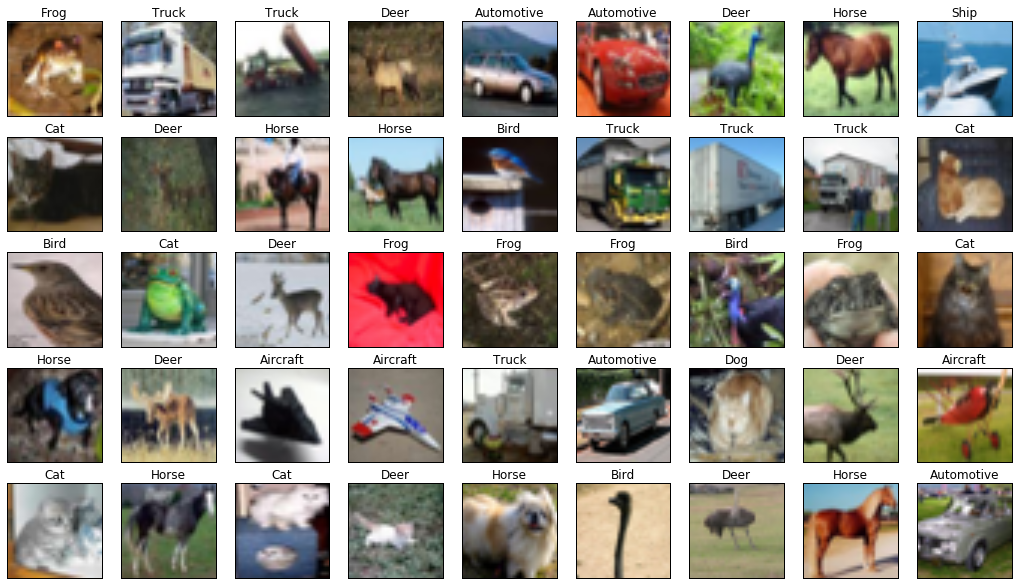

In [83]:
image_counter=0

fig = plt.figure(figsize=(18,10))
while image_counter<45:
    
    Image = makeimage(Image_test_x[image_counter])
        
    Feed_Data = np.array(Test_x[image_counter].reshape(32,32,1))
    model_out = model.predict([Feed_Data])[0]
    
    Predicted_Label = get_label(model_out)
    Actual_Label = get_label(Image_test_y[image_counter])
    
    y = fig.add_subplot(5,9,image_counter+1)
    y.imshow(Image)
    plt.title(Predicted_Label)
    y.axes.get_xaxis().set_visible(False)
    y.axes.get_yaxis().set_visible(False)
    image_counter+=1
plt.show() 
    
    

### Wrong Predictiong

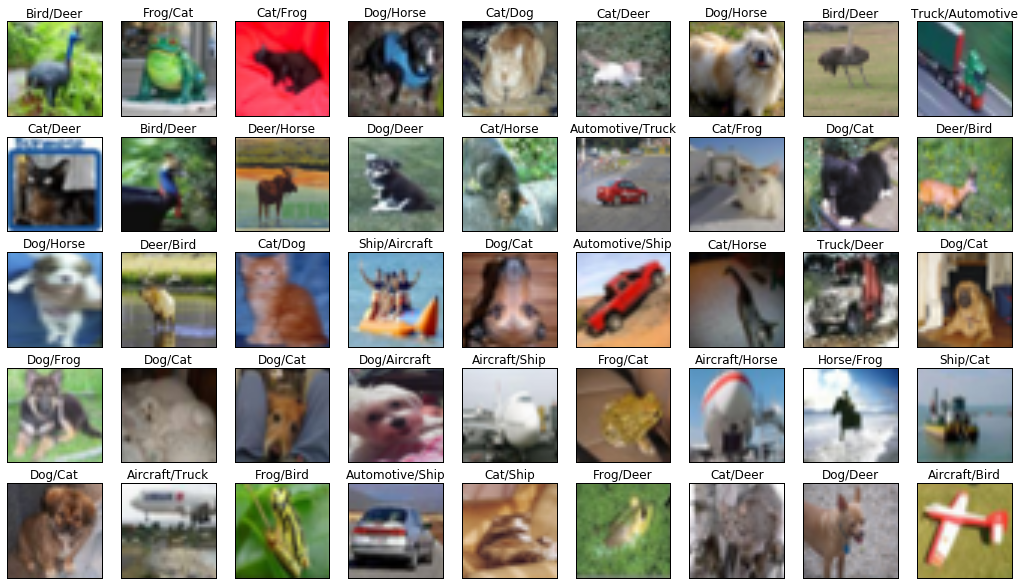

In [84]:
image_counter=0
print_counter=0
fig = plt.figure(figsize=(18,10))
while print_counter<45:
    
    Image = makeimage(Image_test_x[image_counter])
        
    Feed_Data = np.array(Test_x[image_counter].reshape(32,32,1))
    model_out = model.predict([Feed_Data])[0]
    
    Predicted_Label = get_label(model_out)
    Actual_Label = get_label(Image_test_y[image_counter])
    if (Predicted_Label != Actual_Label):
        y = fig.add_subplot(5,9,print_counter+1)
        y.imshow(Image)
        plt.title(Actual_Label+"/"+Predicted_Label)
        y.axes.get_xaxis().set_visible(False)
        y.axes.get_yaxis().set_visible(False)
        print_counter+=1
    image_counter+=1
plt.show() 
    

numpy.int32